# Reinforcement Learning using Q-Learning

## Problem Statement

* Description : There are four designated locations in the grid world indicated by R(ed), G(reen), Y(ellow), and B(lue). When the episode starts, the taxi starts off at a random square and the passenger is at a random location. The taxi drives to the passenger’s location, picks up the passenger, drives to the passenger’s destination (another one of the four specified locations), and then drops off the passenger. Once the passenger is dropped off, the episode ends.

* Example of the Map :
```
        +---------+
        |R: | : :G|
        | : | : : |
        | : : : : |
        | | : | : |
        |Y| : |B: |
        +---------+
```

* Actions : There are 6 discrete deterministic actions:
    * 0: move south
    * 1: move north
    * 2: move east 
    * 3: move west 
    * 4: pickup passenger
    * 5: drop off passenger

There are 500 discrete states since there are 25 taxi positions, 5 possible locations of the passenger (including the case when the passenger is in the taxi), and 4 destination locations.

Each state space is represented by the tuple: (taxi_row, taxi_col, passenger_location, destination)

An observation is an integer that encodes the corresponding state. 

* Passenger locations:

    * 0: R(ed)

    * 1: G(reen)

    * 2: Y(ellow)

    * 3: B(lue)

    * 4: in taxi

* Destinations:

    * 0: R(ed)

    * 1: G(reen)

    * 2: Y(ellow)

    * 3: B(lue)

* Rewards
    * -1 per step unless other reward is triggered.

    * +20 delivering passenger.

    * -10 executing “pickup” and “drop-off” actions illegally.

## Q-Learning Algorithm by Steps:

* Initialization: Initialize the Q-table with arbitrary values or random numbers for each state-action pair.

* Exploration vs. Exploitation: Choose an action to take in the current state using an exploration-exploitation strategy
This strategy balances between exploring new actions and exploiting actions that have given good results before.

* Action Execution and Reward: Take the chosen action and observe the reward received from the environment. Transition to the next state.

* Q-Value Update: Update the Q-value of the current state-action pair using the Q-learning update equation:

    Q(s, a) = Q(s, a) + α * [R + γ * max(Q(s', a')) - Q(s, a)]

    Here, Q(s, a) represents the Q-value for state s and action a, α is the learning rate that determines the impact of new information, R is the reward received, γ is the discount factor for future rewards, s' is the new state, and a' is the action that maximizes the Q-value in the new state.

* Repeat Steps 2-4: Repeat the above steps by updating the current state, choosing actions, executing them, and updating the Q-values until the agent reaches the terminal state or maximum number of steps.

* Convergence: Continue the iterations until the Q-values converge, meaning they stop changing significantly or reach a desired level of accuracy.

* Optimal Policy: Once the learning process is complete, the agent can select the action with the highest Q-value for each state to determine the optimal policy.

By repeating these steps and interacting with the environment, the Q-Learning algorithm enables the agent to learn the optimal policy and make intelligent decisions to maximize rewards in a given task.

## Screenshots of the environment:

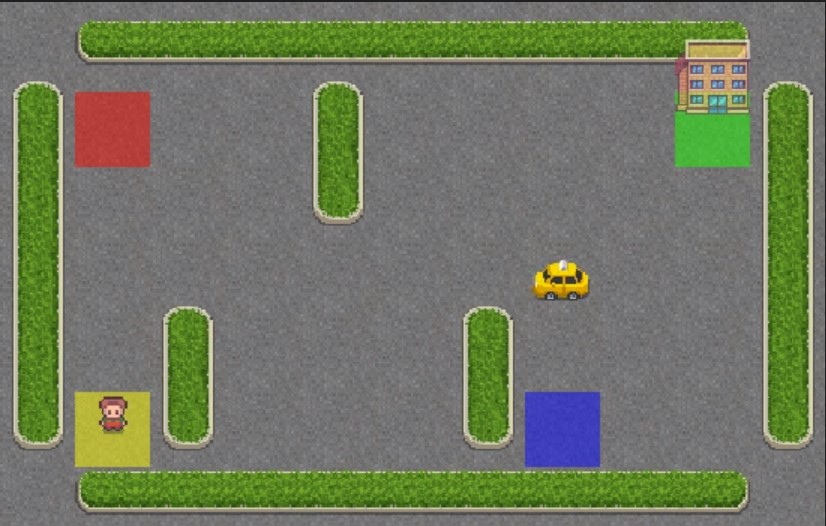

In [4]:
from IPython.display import Image, display
display(Image(filename='screenshots/screenshot1.jpg'))

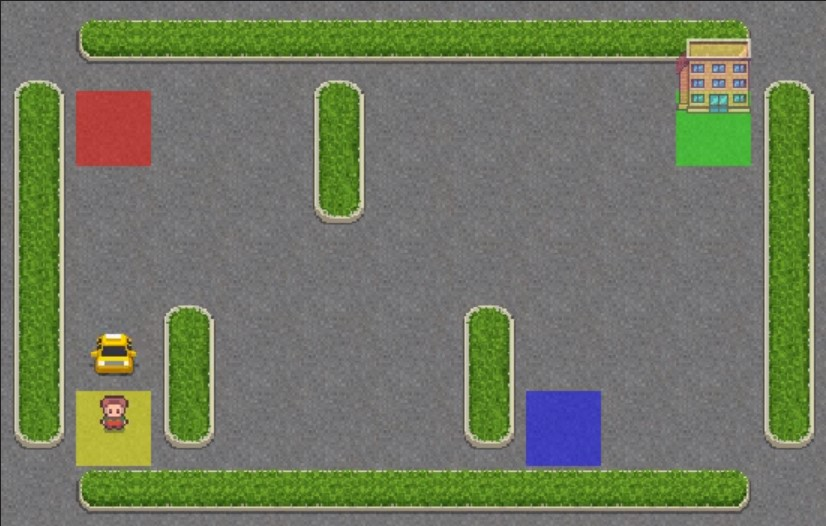

In [5]:
display(Image(filename='screenshots/screenshot2.jpg'))

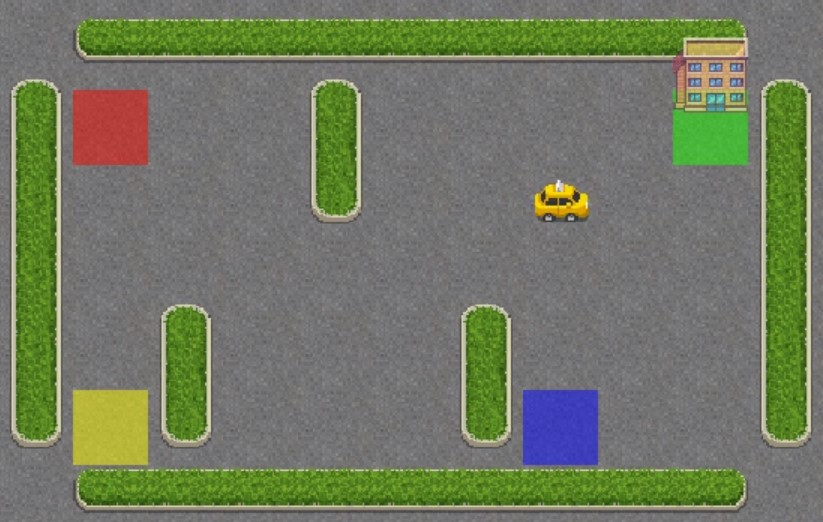

In [6]:
display(Image(filename='screenshots/screenshot3.jpg'))

## Q-Learning Implementation for Taxi-v3

* Importing necessary libraries:

In [7]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

* Defining the Q-Learning Class:

In [8]:
class QLearningAgent:
    def __init__(self, env, learning_rate, discount_factor, exploration_rate, max_exploration_rate,
                 min_exploration_rate, exploration_decay_rate):
        """
        Initialize the Q-Learning agent.

        Args:
            env: The Gym environment.
            learning_rate: The learning rate (alpha) for Q-value updates.
            discount_factor: The discount factor (gamma) for future rewards.
            exploration_rate: The initial exploration rate (epsilon) for epsilon-greedy policy.
            max_exploration_rate: The maximum exploration rate.
            min_exploration_rate: The minimum exploration rate.
            exploration_decay_rate: The decay rate for exploration rate.

        """
        # Setting the environment and the parameters
        self.env = env
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate
        self.max_exploration_rate = max_exploration_rate
        self.min_exploration_rate = min_exploration_rate
        self.exploration_decay_rate = exploration_decay_rate

        self.num_states = env.observation_space.n
        self.num_actions = env.action_space.n
        self.q_table = np.zeros((self.num_states, self.num_actions))

    def update_q_table(self, state, action, reward, next_state):
        """
        Update the Q-table based on the observed transition.

        Args:
            state: The current state.
            action: The taken action.
            reward: The observed reward.
            next_state: The next state.
            terminated: Whether the episode is terminated.

        """
        # Get the maximum Q-value for the next state
        max_q_value = np.max(self.q_table[next_state])
        # Update the Q-table using the Q-learning update rule
        self.q_table[state, action] = (self.q_table[state, action] + self.learning_rate * 
                                       (reward + self.discount_factor * max_q_value - self.q_table[state, action]))

    def train(self, num_episodes, max_steps_per_episode, episode_list, experiment_name):
        """
        Train the Q-Learning agent.

        Args:
            num_episodes: The number of episodes to train.
            max_steps_per_episode: The maximum number of steps per episode.

        Returns:
            rewards: List of episode rewards.
            exploration_rates: List of exploration rates.

        """
        rewards = []
        exploration_rates = []
        
        # Create a RecordVideo wrapper to record the training as a video
        # and save it in the "video" folder for episodes in episode_list
        #self. env = gym.wrappers.RecordVideo(self.env, "video/"+experiment_name,
        #                                     episode_trigger=lambda x: x in episode_list)

        for episode in range(num_episodes):
            state, _ = self.env.reset()
            episode_reward = 0
            terminated = False

            for step in range(max_steps_per_episode):
                # Exploration-exploitation trade-off
                exploration_threshold = np.random.uniform(0, 1)
                # Explore (take a random action) with probability exploration_rate
                if exploration_threshold > self.exploration_rate:
                    action = np.argmax(self.q_table[state])
                # Exploit take the optimal action with the highest Q-value) 
                # with probability 1 - exploration_rate
                else:
                    action = self.env.action_space.sample()

                # Take the action (a) and observe the outcome state(s') and reward (r)
                next_state, reward, terminated, truncated, _ = self.env.step(action)

                # Update the Q-table
                self.update_q_table(state, action, reward, next_state)

                state = next_state
                # accumulate reward
                episode_reward += reward
                
                # Check if agent reached the goal or the maximum number of steps per episode
                # is reached
                if terminated or truncated:
                    break

            # Decay exploration rate
            self.exploration_rate = (self.min_exploration_rate + (self.max_exploration_rate - self.min_exploration_rate)
                                     * np.exp(-self.exploration_decay_rate * episode))

            # Collect the episode reward and exploration rate
            rewards.append(episode_reward)
            exploration_rates.append(self.exploration_rate)
        
        #self.env.close()

        return rewards, exploration_rates

* Deifining the Plotting Function:

In [9]:
# define function to plot the training rewards and exploration rates
def plot_training(rewards, exploration_rates):
    fig, ax1 = plt.subplots()
    fig.set_size_inches(6, 4)
    color = 'tab:red'
    ax1.set_xlabel('Episode')
    ax1.set_ylabel('Training reward', color=color)
    ax1.plot(rewards, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('Exploration rate', color=color)  # we already handled the x-label with ax1
    ax2.plot(exploration_rates, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

* Creating the Environment:

In [10]:
env = gym.make('Taxi-v3',render_mode='rgb_array')

* Defining the Hyperparameters:(Default values are given for further experiments it can be changed)

In [11]:
num_episodes = 1000
max_steps_per_episode = 100
learning_rate = 0.5
discount_factor = 0.6
exploration_rate = 1.0
max_exploration_rate = 1.0
min_exploration_rate = 0.01
exploration_decay_rate = 0.01

* Training the Agent:

In [12]:
# Create Q-Learning agent
agent = QLearningAgent(env, learning_rate, discount_factor, exploration_rate, max_exploration_rate,
                        min_exploration_rate, exploration_decay_rate)

# Train the agent
rewards, exploration_rates = agent.train(num_episodes, max_steps_per_episode, [100, 200, 600, 1000], "trial1")

* Plotting the Rewards and Exploration Rate:

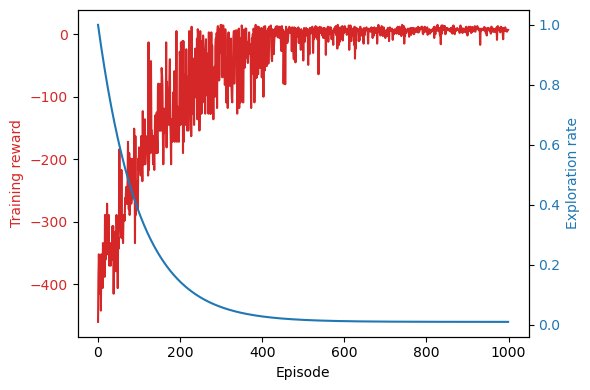

In [13]:
plot_training(rewards, exploration_rates)

## Experiments

### Independent Variable : Learning Rate

* Learning Rate = 0.3

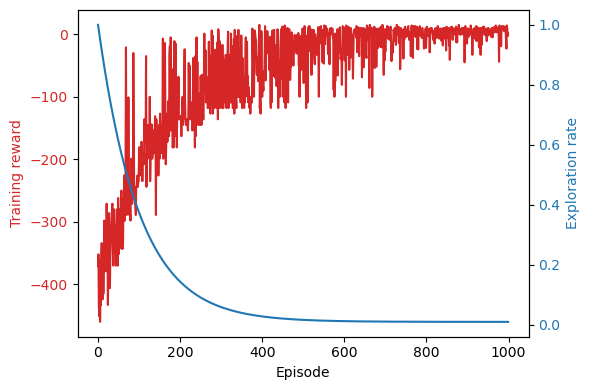

In [14]:
learning_rate = 0.3

# Create Q-Learning agent
agent = QLearningAgent(env, learning_rate, discount_factor, exploration_rate, max_exploration_rate,
                        min_exploration_rate, exploration_decay_rate)

# Train the agent
rewards, exploration_rates = agent.train(num_episodes, max_steps_per_episode, [100, 300, 500, 700], "LearningRate0.3")

# Plot the training rewards and exploration rates
plot_training(rewards, exploration_rates)

We can see from the videos and plot that the agent is able to reach the goal state but it takes around 500 episodes to converge. We can also see that the agent is not able to reach the goal state in the first few episodes as the exploration rate is high and it is exploring the environment but as the exploration rate decreases the agent is able to reach the goal state. For further investigation we can increase the learning rate and see the results.

* Learning Rate = 0.5

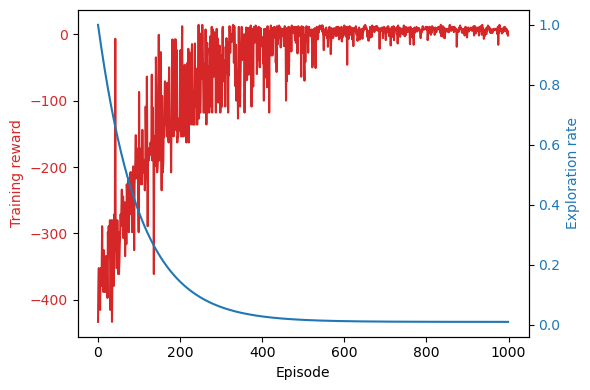

In [15]:
learning_rate = 0.5

# Create Q-Learning agent
agent = QLearningAgent(env, learning_rate, discount_factor, exploration_rate, max_exploration_rate,
                        min_exploration_rate, exploration_decay_rate)

# Train the agent
rewards, exploration_rates = agent.train(num_episodes, max_steps_per_episode, [100, 300, 500, 700], "LearningRate0.5")

# Plot the training rewards and exploration rates
plot_training(rewards, exploration_rates)

On plot we can see that the agent is able to converge to the goal state in less number of episodes as compared to the previous case. From recorded videos we can observe that in 300th episode the agent is able to reach the goal state directly for learning rate = 0.5 whereas for learning rate = 0.3 the agent is still struggling to reach the goal state. Let's decrease the learning rate below 0.3 and see the results.

* Learning Rate = 0.1

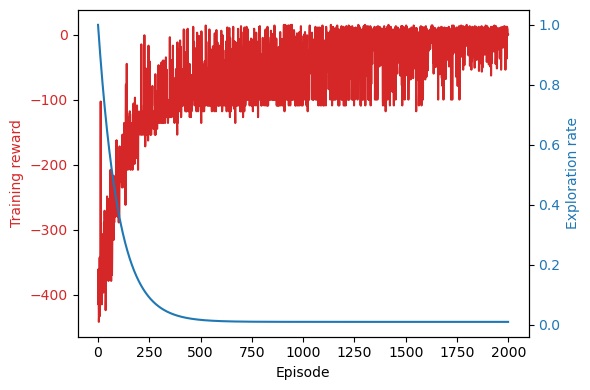

In [16]:
learning_rate = 0.1
# increased the number of episodes to see if the agent can converge eventually
num_episodes = 2000
# Create Q-Learning agent
agent = QLearningAgent(env, learning_rate, discount_factor, exploration_rate, max_exploration_rate,
                        min_exploration_rate, exploration_decay_rate)

# Train the agent
rewards, exploration_rates = agent.train(num_episodes, max_steps_per_episode, [100, 500, 1000, 1500], "LearningRate0.1")

# Plot the training rewards and exploration rates
plot_training(rewards, exploration_rates)

We can see from the plot that the agent is not able to fully converge. There is a high probability that the agent got stuck in the local minima. This tells us that the learning rate should not be too low. 0.5 is the best learning rate for this environment so far, we will keep that learning rate for further experiments.

In [17]:
learning_rate = 0.5
num_episodes = 1000

### Independent Variable : Discount Factor

* Discount Factor = 0.3

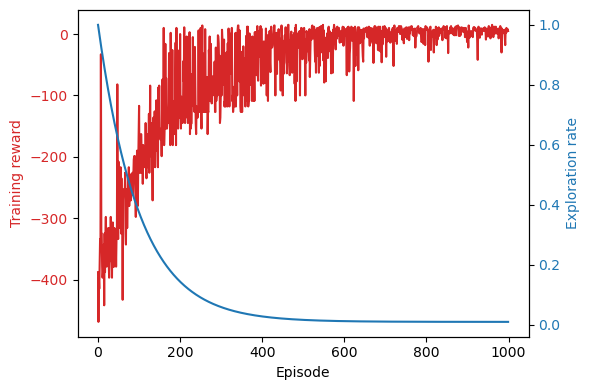

In [18]:
discount_factor = 0.3

# Create Q-Learning agent
agent = QLearningAgent(env, learning_rate, discount_factor, exploration_rate, max_exploration_rate,
                        min_exploration_rate, exploration_decay_rate)

# Train the agent
rewards, exploration_rates = agent.train(num_episodes, max_steps_per_episode, [100, 300, 500, 700], "DiscountFactor0.3")

# Plot the training rewards and exploration rates
plot_training(rewards, exploration_rates)

From the plot we can say it is taking slightly longer to converge compared to the 0.6 discount factor.

* Discount Factor = 0.1

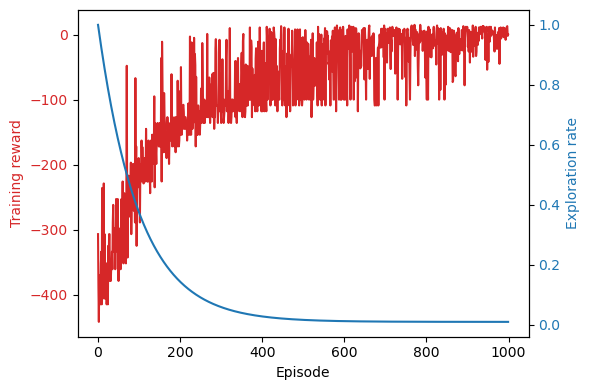

In [19]:
discount_factor = 0.1

# Create Q-Learning agent
agent = QLearningAgent(env, learning_rate, discount_factor, exploration_rate, max_exploration_rate,
                        min_exploration_rate, exploration_decay_rate)

# Train the agent
rewards, exploration_rates = agent.train(num_episodes, max_steps_per_episode, [100, 300, 500, 700], "DiscountFactor0.1")

# Plot the training rewards and exploration rates
plot_training(rewards, exploration_rates)

After decreasing the discount factor even more we can see that the agent is taking more time to converge as compared to the previous case. This tells us that the discount factor should not be too low. 0.6 is the best discount factor for this environment so far let's see what happens if we have a large discount factor.

* Discount Factor = 0.9

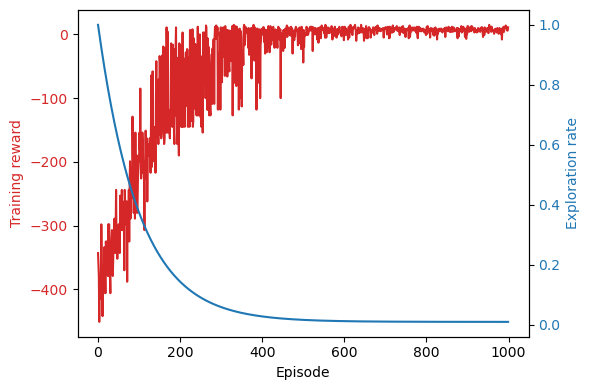

In [20]:
discount_factor = 0.9

# Create Q-Learning agent
agent = QLearningAgent(env, learning_rate, discount_factor, exploration_rate, max_exploration_rate,
                        min_exploration_rate, exploration_decay_rate)

# Train the agent
rewards, exploration_rates = agent.train(num_episodes, max_steps_per_episode, [100, 300, 500, 700], "DiscountFactor0.9")

# Plot the training rewards and exploration rates
plot_training(rewards, exploration_rates)

There is not much of a difference in the plot as compared to the 0.6 discount factor for this environment but in case of a complex environment we should be careful while choosing the discount factor. Discount factor forces the agent to focus on future rewards or immediate rewards. If the discount factor is too high the agent will focus on future rewards and if the discount factor is too low the agent will focus on immediate rewards. 0.6 is the best discount factor for this environment so far, we will keep that discount factor for further experiments.

In [21]:
discount_factor = 0.6

### Independent Variable : Exploration Decay Rate

* Exploration Decay Rate = 0.001 (Really slow decay)

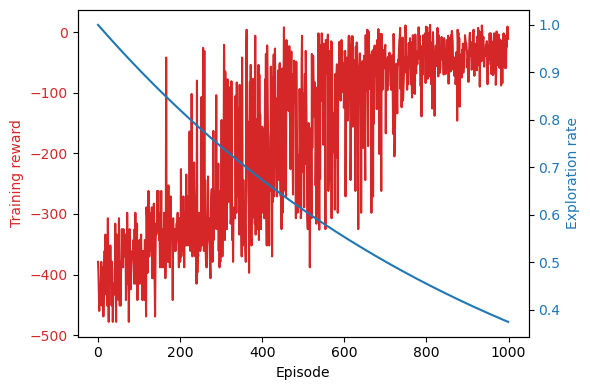

In [22]:
exploration_decay_rate = 0.001

# Create Q-Learning agent
agent = QLearningAgent(env, learning_rate, discount_factor, exploration_rate, max_exploration_rate,
                        min_exploration_rate, exploration_decay_rate)

# Train the agent
rewards, exploration_rates = agent.train(num_episodes, max_steps_per_episode, [100, 300, 500, 700], "DecayRate0.001")

# Plot the training rewards and exploration rates
plot_training(rewards, exploration_rates)

Since decay rate is really slow the agent is not able to converge to the goal state optimally. The agent is taking more time to converge as compared to the 0.01 (default). This tells us that the decay rate should not be too low because if the decay rate is too low the agent will be mostly focusing on exploration and not on exploitation. Let's try a high decay rate.

* Exploration Decay Rate = 0.1 (Really fast decay)

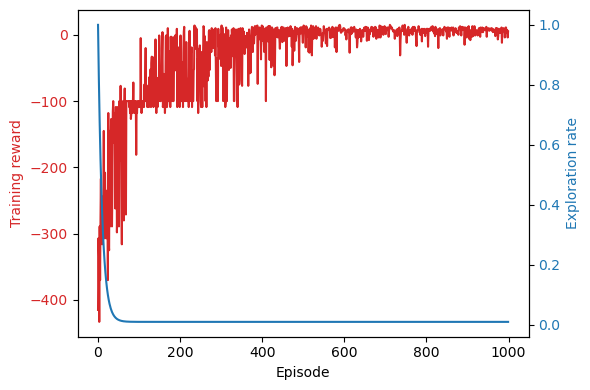

In [23]:
exploration_decay_rate = 0.1

# Create Q-Learning agent
agent = QLearningAgent(env, learning_rate, discount_factor, exploration_rate, max_exploration_rate,
                        min_exploration_rate, exploration_decay_rate)

# Train the agent
rewards, exploration_rates = agent.train(num_episodes, max_steps_per_episode, [100, 300, 500, 700], "DecayRate0.1")

# Plot the training rewards and exploration rates
plot_training(rewards, exploration_rates)

We can notice that because it focuses on exploiting, after a really short time reward goes up faster first. Even though it looks like it converges faster than the default decay rate on the plot, it is not optimal. Because there is a chance that agent haven't gone through some combination of states due to the fast decay rate. From the videos we can see in 300th epsiode it is struggling to reach the goal whereas in 100th episode it is able to reach the goal state directly. This tells us that the decay rate should not be too high because if the decay rate is too high the agent will be mostly focusing on exploitation and not on exploration.

In [27]:
exploration_decay_rate = 0.01

### Independent Variable : Maximum Steps per Episode

* Maximum Steps per Episode = 50 (lower than default)

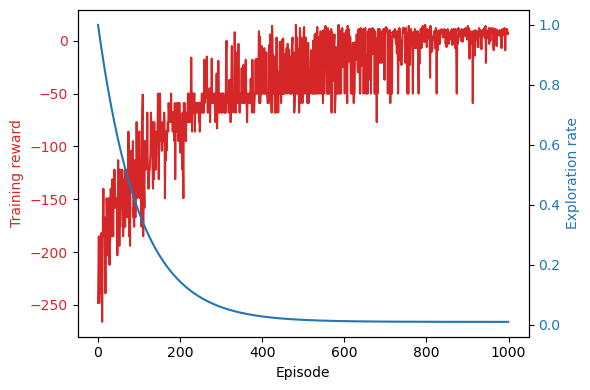

In [25]:
max_steps_per_episode = 50

# Create Q-Learning agent
agent = QLearningAgent(env, learning_rate, discount_factor, exploration_rate, max_exploration_rate,
                        min_exploration_rate, exploration_decay_rate)

# Train the agent
rewards, exploration_rates = agent.train(num_episodes, max_steps_per_episode, [100, 300, 500, 700], "MaxSteps50")

# Plot the training rewards and exploration rates
plot_training(rewards, exploration_rates)

It is struggling to converge to the optimum. We can try a larger value for maximum steps per episode.

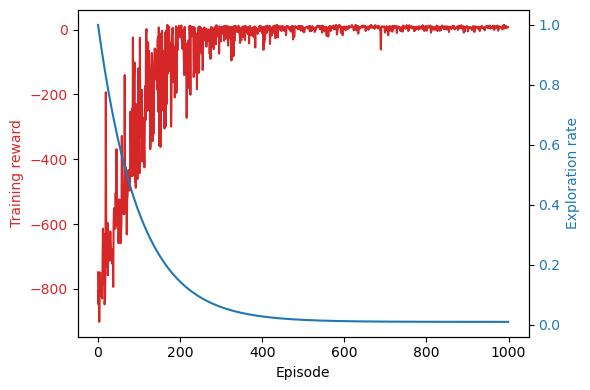

In [26]:
max_steps_per_episode = 200

# Create Q-Learning agent
agent = QLearningAgent(env, learning_rate, discount_factor, exploration_rate, max_exploration_rate,
                        min_exploration_rate, exploration_decay_rate)

# Train the agent
rewards, exploration_rates = agent.train(num_episodes, max_steps_per_episode, [100, 300, 500, 700], "MaxSteps200")

# Plot the training rewards and exploration rates
plot_training(rewards, exploration_rates)

This one converges faster in terms of number of episodes and also is able to reach to optimum but we should consider how many steps it would take to reach the goal state in our particular environment. If the maximum steps per episode is too low the agent will not be able to reach the goal state. If the maximum steps per episode is too high the training process will take longer. Since our environment is not that complex we can keep 200 as the final value for maximum number of steps per episode.

## Final Model

* Defining the final parameters:

In [28]:
num_episodes = 1000
max_steps_per_episode = 200
learning_rate = 0.5
discount_factor = 0.6
exploration_rate = 1.0
max_exploration_rate = 1.0
min_exploration_rate = 0.01
exploration_decay_rate = 0.01

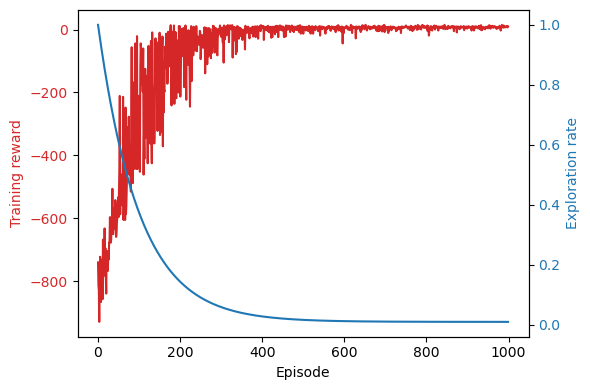

In [29]:
# Create Q-Learning agent
agent = QLearningAgent(env, learning_rate, discount_factor, exploration_rate, max_exploration_rate,
                        min_exploration_rate, exploration_decay_rate)

# Train the agent
rewards, exploration_rates = agent.train(num_episodes, max_steps_per_episode, [100, 300, 500, 700, 900], "Final")

# Plot the training rewards and exploration rates
plot_training(rewards, exploration_rates)

Our final model is converging really fast and is able to converge to optimum as we were able to find the best hyperparameters for this environment. From the videos we can see that the agent is able to reach the goal state.